# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import ensemble
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
# Collect the data
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

#  Clean and Explore the Data


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df = df[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
df1 = df1[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

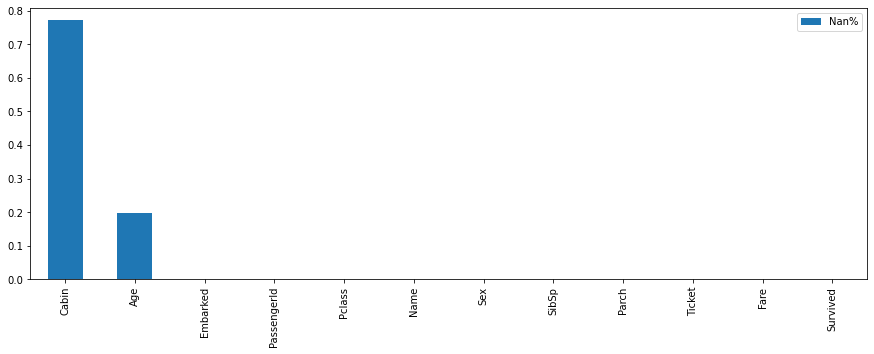

In [17]:
cantidadna = pd.DataFrame({'ColNombre': df.columns,'Nan%':np.sum(df.isnull(),axis=0)/len(df)})
cantidadna.sort_values('Nan%',ascending=False,inplace=True)
cantidadnasub = cantidadna[0:30]
cantidadnasub.plot.bar(figsize = (15,5))

In [18]:

df_cld = df.drop(['PassengerId','Name','Ticket','Cabin'], axis =1)
df_cld1 = df1.drop(['PassengerId','Name','Ticket','Cabin'], axis =1)

avg_horsepower = df['Age'].astype('float').mean(axis=0)
df_cld['Age'].replace(np.nan, avg_horsepower, inplace=True)
df_cld['Age'] = df_cld['Age'].astype('int')

df_cld1['Age'].replace(np.nan, avg_horsepower, inplace=True)
df_cld1['Age'] = df_cld1['Age'].astype('int')

df_cld.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [21]:
moda = df_cld['Embarked'].mode()[0]
df_cld['Embarked'] = df_cld['Embarked'].fillna(moda)

dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df_cld[col]))
    
titanic_dummies = pd.concat(dummies,axis=1)


df = pd.concat((df_cld,titanic_dummies),axis=1)

df = df.drop(['Pclass','Sex','Embarked'],axis=1)

df.dtypes

Age           int32
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
1             uint8
2             uint8
3             uint8
female        uint8
male          uint8
C             uint8
Q             uint8
S             uint8
dtype: object

In [10]:
X = df.drop(['Survived'],axis=1)
X = X.values

y = df['Survived'].values

# Build and Evaluate the Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.3, random_state = 0)

In [14]:
model = ensemble.GradientBoostingClassifier(n_estimators=100)
model.fit (X_train, y_train)
y_pred = model.predict(X_test)
model.score (X_test, y_test)

0.8507462686567164

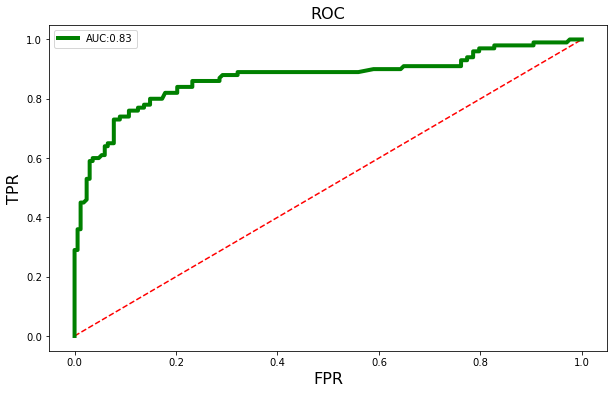

In [17]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1], 'r--')

probs = model.predict_proba(X_test)

probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test,y_pred)

label = 'AUC:' +'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='g', label = label, linewidth=4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC',fontsize =16)
plt.legend();

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       168
           1       0.85      0.73      0.78       100

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

